In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [15]:
run_path = '../'
test_name = 'HarmonicOscillator1D_HighFreq'
# test_name = 'Heat_Eq_1+1D'

test_path = os.path.join(run_path, test_name)

In [16]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
runs

['CKAN_128',
 'CKAN_16',
 'CKAN_32',
 'CKAN_64',
 'CKAN_8',
 'CKAN_A_128',
 'CKAN_A_16',
 'CKAN_A_32',
 'CKAN_A_64',
 'CKAN_A_8',
 'FCN_128',
 'FCN_32',
 'FCN_8',
 'FCN_A_128',
 'FCN_A_32',
 'FCN_A_8',
 'LKAN_128',
 'LKAN_16',
 'LKAN_32',
 'LKAN_64',
 'LKAN_8',
 'LKAN_A_128',
 'LKAN_A_16',
 'LKAN_A_32',
 'LKAN_A_64',
 'LKAN_A_8']

In [17]:
analyser = RunAnalyser(runs, test_path)

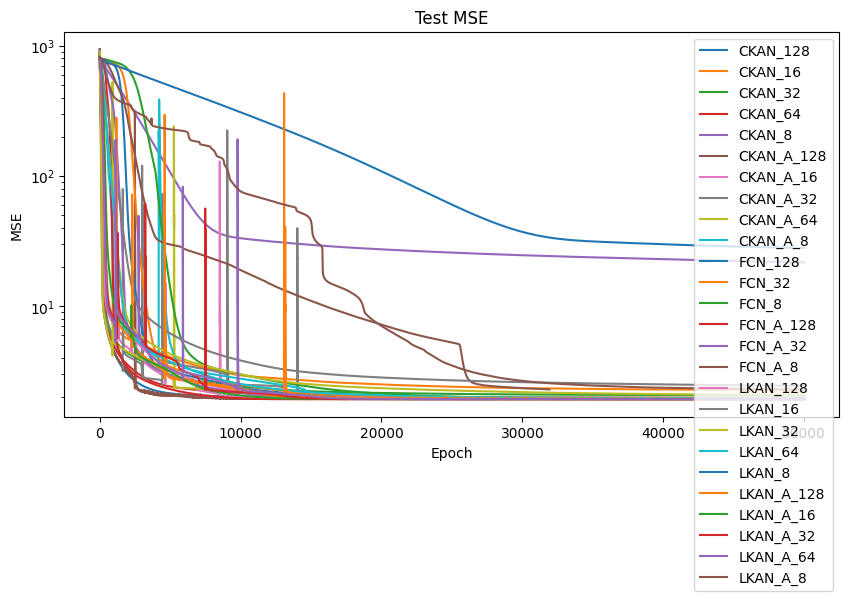

In [18]:
# Plot all models
analyser.plot_mses()

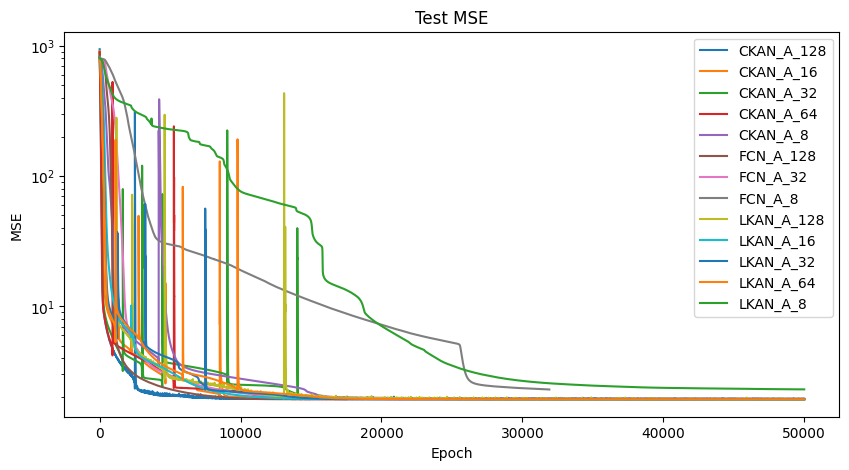

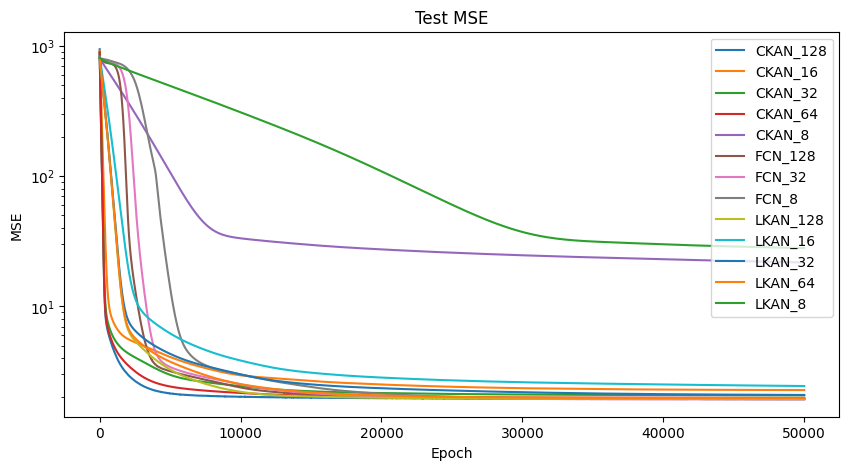

(None, None)

In [19]:
analyser.plot_mses(filter=adaptive_filter), analyser.plot_mses(filter=non_adaptive_filter)

# Non-adaptive analysis

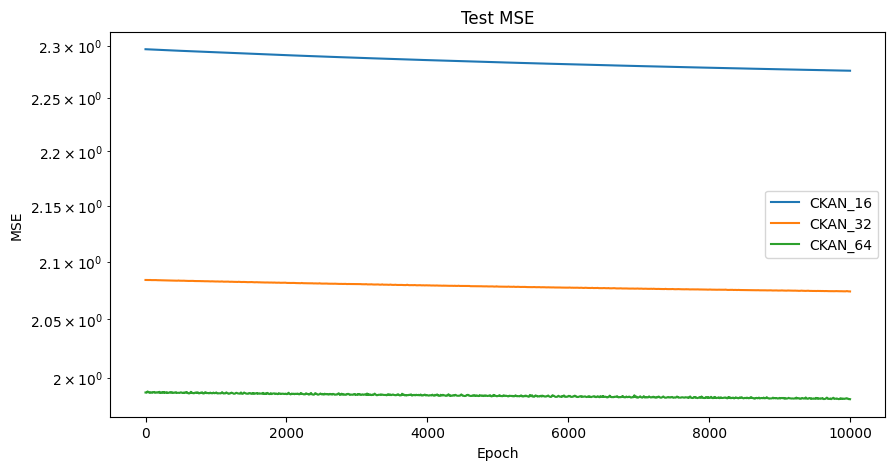

In [20]:
non_adaptive_ckans = lambda x: model_filter(x, 'CKAN') and non_adaptive_filter(x) and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=non_adaptive_ckans, start=40000)

CKAN_64 is best, 16, 32 are comparable

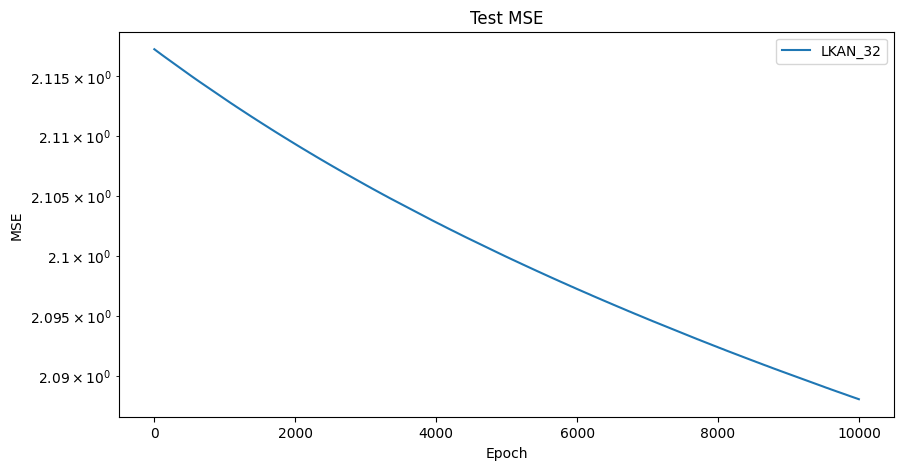

In [21]:
non_adaptive_lkans = lambda x: model_filter(x, 'LKAN') and non_adaptive_filter(x) and ('_32' in x )#or '_16' in x
analyser.plot_mses(filter=non_adaptive_lkans, start=40000)

Same as CKAN

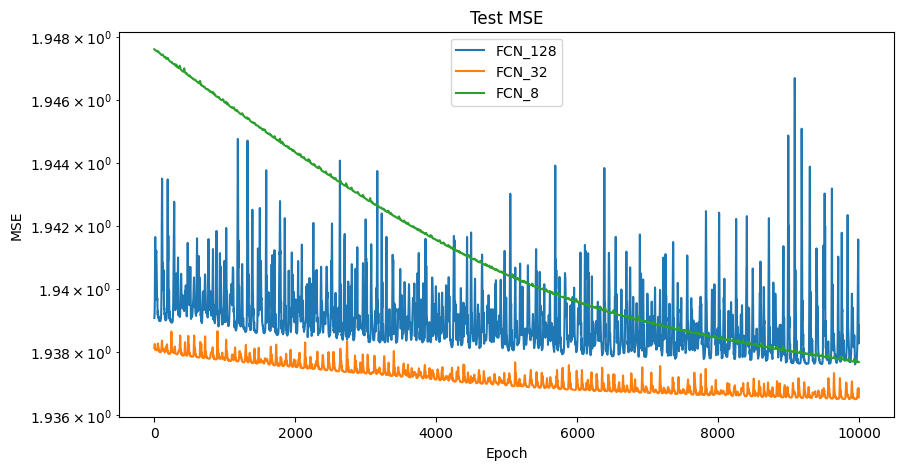

In [22]:
non_adaptive_fcns = lambda x: model_filter(x, 'FCN') and non_adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=non_adaptive_fcns, start=40000)

FCN 32 is best but 8 is still reducing

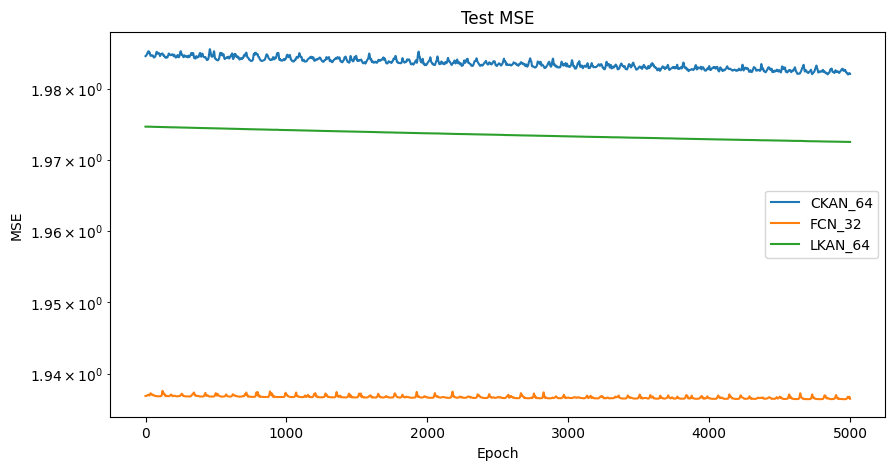

In [23]:
d = ['FCN_32', 'CKAN_64', 'LKAN_64']
f = lambda x: x in d
analyser.plot_mses(filter=f, start=45000)

all models are essentially equal

# Adaptive analysis

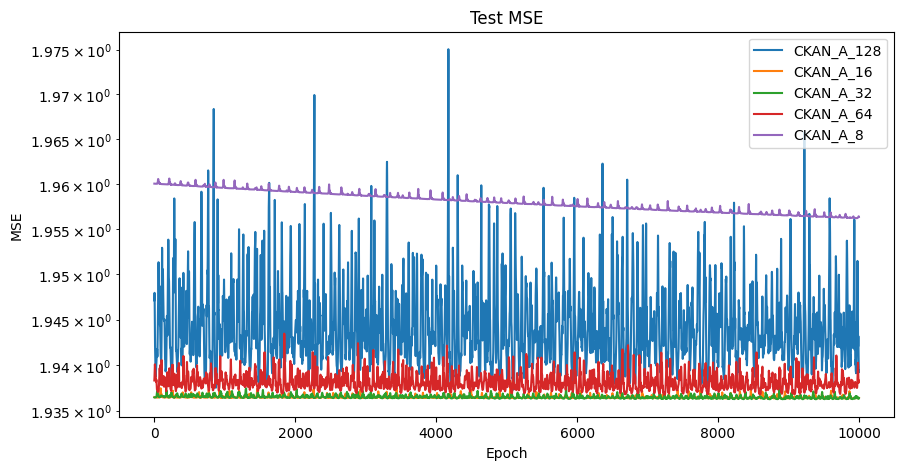

In [24]:
adaptive_ckans = lambda x: model_filter(x, 'CKAN') and adaptive_filter(x)# and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=adaptive_ckans, start=40000)

32 is best, 16 and 64 are also good, 8 is also impressive for model size

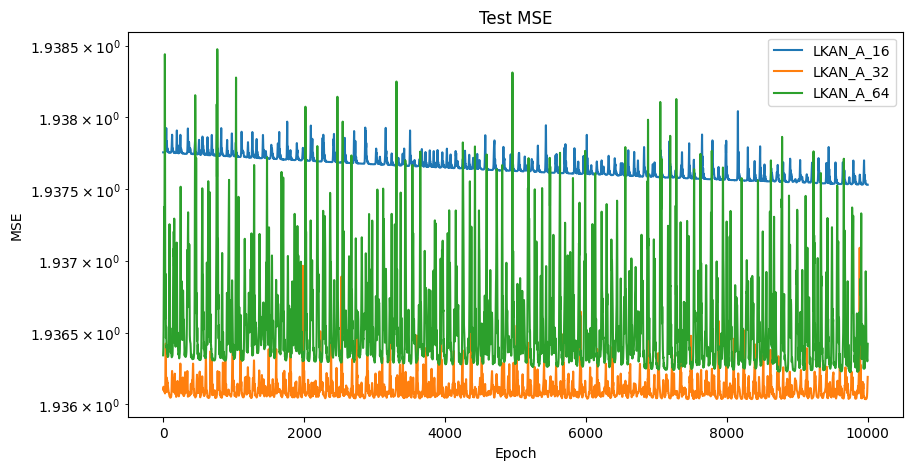

In [25]:
adaptive_lkans = lambda x: model_filter(x, 'LKAN') and adaptive_filter(x) and '_128' not in x and '_8' not in x #  and '_8' not in x
analyser.plot_mses(filter=adaptive_lkans, start=40000)

32 and 64 are best

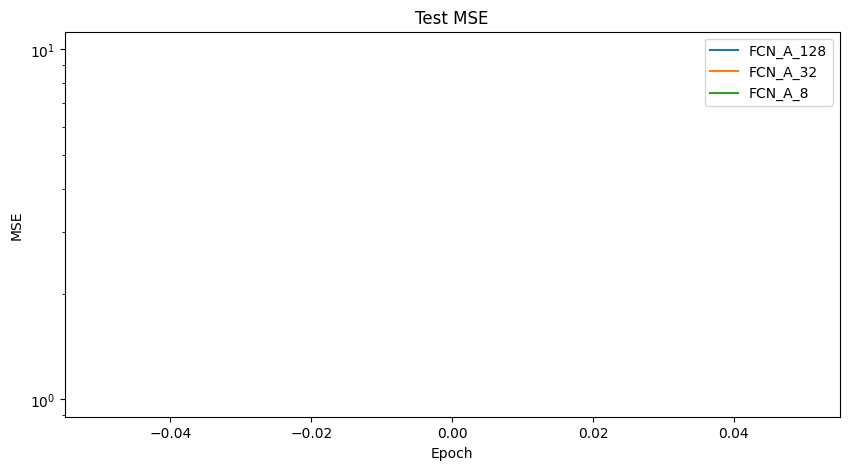

In [26]:
adaptive_fcns = lambda x: model_filter(x, 'FCN') and adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=adaptive_fcns, start=40000)

became NAN

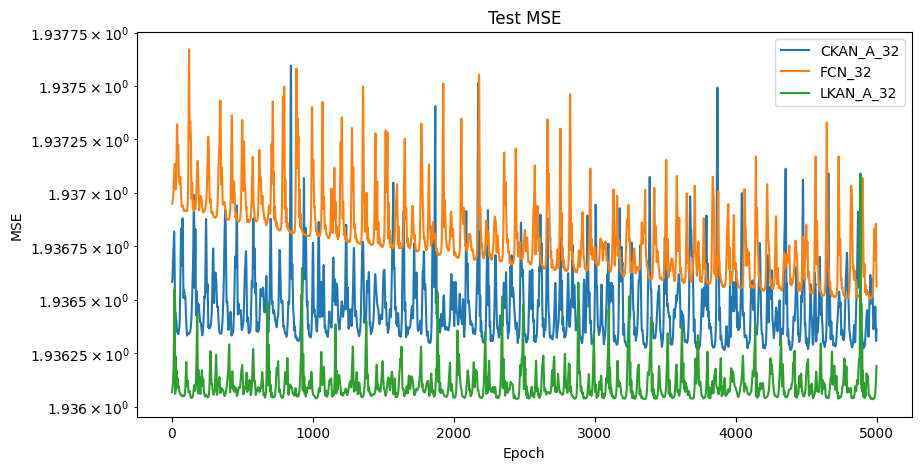

In [27]:
d = ['FCN_32', 'CKAN_A_32', 'LKAN_A_32']
f = lambda x: x in d
analyser.plot_mses(filter=f, start=45000)

all models are even more equal. perform parameter count analysis

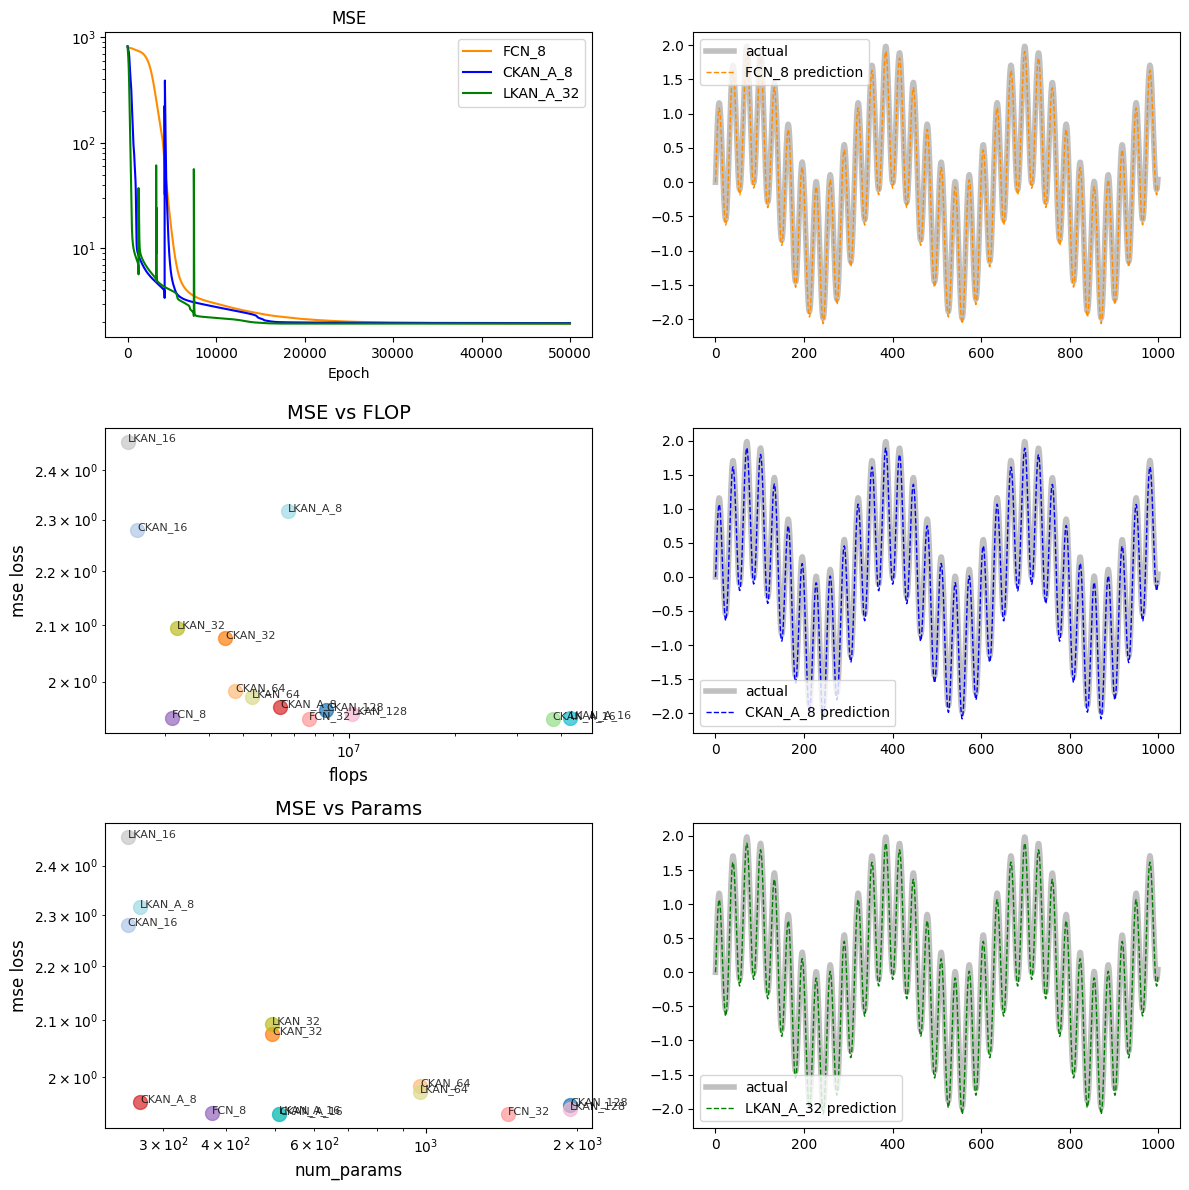

In [31]:
f = lambda x: x not in ['LKAN_8', 'CKAN_8', 'LKAN_A_128', 'CKAN_A_128', 'LKAN_A_64', 'CKAN_A_64', 'FCN_128', 'CKAN_A_32', 'LKAN_A_32']
# f = lambda _: True

plt.figure(figsize=(12, 12))

plt.subplot(3,2,1)
plt.semilogy(analyser.mses['FCN_8'], label='FCN_8', color='darkorange')
plt.semilogy(analyser.mses['CKAN_A_8'], label='CKAN_A_8', color='blue')
plt.semilogy(analyser.mses['LKAN_A_32'], label='LKAN_A_32', color='green')
plt.title('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(3,2,3)
analyser.plot_mse_over_flops(filter=f, noshow=True, legend=False)

plt.subplot(3,2,5)
analyser.plot_mse_over_params(filter=f, noshow=True, legend=False)

pred_file = f'test_50000.npy'
exact_file = 'test_exact.npy'

plt.subplot(3,2,2)
pred = np.load(os.path.join(test_path, 'FCN_8', pred_file))
exact = np.load(os.path.join(test_path, 'FCN_8', exact_file))
plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(pred, label=f'FCN_8 prediction', linestyle='--', color='darkorange', linewidth=1)
plt.legend()

plt.subplot(3,2,4)
pred = np.load(os.path.join(test_path, 'CKAN_A_8', pred_file))
exact = np.load(os.path.join(test_path, 'CKAN_A_8', exact_file))
plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(pred, label=f'CKAN_A_8 prediction', linestyle='--', color='blue', linewidth=1)
plt.legend()

plt.subplot(3,2,6)
pred = np.load(os.path.join(test_path, 'LKAN_A_32', pred_file))
exact = np.load(os.path.join(test_path, 'LKAN_A_32', exact_file))
plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(pred, label=f'LKAN_A_32 prediction', linestyle='--', color='green', linewidth=1)
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
analyser.get_num_params(filter=lambda x: x in ['FCN_8', 'CKAN_A_8', 'LKAN_A_32', 'CKAN_16', 'LKAN_16', 'LKAN_A_16'])

{'CKAN_16': 255,
 'CKAN_A_8': 270,
 'FCN_8': 375,
 'LKAN_16': 255,
 'LKAN_A_16': 510,
 'LKAN_A_32': 990}